In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#  Read in obesity data.
df = pd.read_csv('obesity.csv')
print(df.head())

#  Split data into a dataframe of features and a series of classes. 
X = df.drop(columns='NObeyesdad')
print(X.head())

y = df['NObeyesdad']
print(y.head())

   Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1        0           0  
2 

In [58]:
#  Create a logisitc regression including all of the features of the dataset and print the model's accuracy.
lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)
print(lr.score(X, y))

0.7659876835622927


{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17), 'cv_scores': array([0.78351492]), 'avg_score': 0.7835149218379914, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')}
('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
0.7835149218379914


C:\Users\DB\anaconda3update\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DB\anaconda3update\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


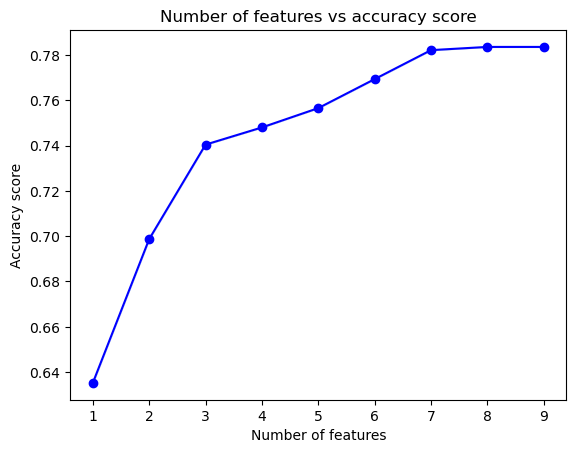

<Figure size 640x480 with 0 Axes>

In [59]:
#  Carry out a foward sequential feature selection and determine the accuracy of the model when it has nine features.
sfs = SFS(lr, k_features=9, forward=True, floating=False, scoring='accuracy', cv=0)
sfs.fit(X, y)
print(sfs.subsets_[9])
print(sfs.subsets_[9]['feature_names'])
print(sfs.subsets_[9]['avg_score'])
plot_sfs(sfs.get_metric_dict())
plt.xlabel("Number of features")
plt.ylabel("Accuracy score")
plt.title("Number of features vs accuracy score")
plt.show()
plt.clf()

{'feature_idx': (0, 1, 2, 3, 6, 9, 10), 'cv_scores': array([0.78209379]), 'avg_score': 0.7820937944102321, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}
('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
0.7820937944102321


C:\Users\DB\anaconda3update\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DB\anaconda3update\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


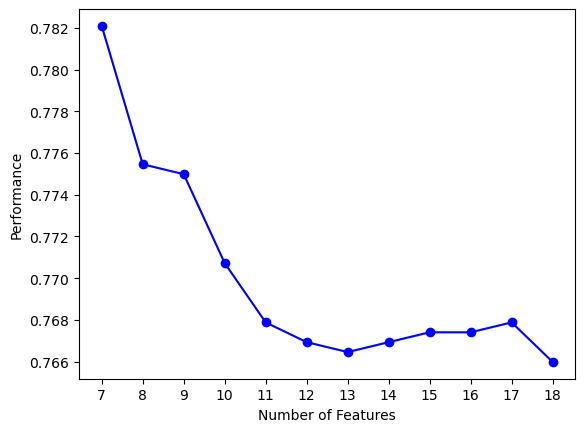

<Figure size 640x480 with 0 Axes>

In [60]:
#  Carry out a backwards sequential feature selection with only 7 variables, as the graph above shows that model accuracy drops only slightly when only 7 features are selected.
sbs = SFS(lr, k_features=7, forward=False, floating=False, scoring='accuracy', cv=0)
sbs.fit(X, y)
print(sbs.subsets_[7])
print(sbs.subsets_[7]['feature_names'])
print(sbs.subsets_[7]['avg_score'])
plot_sfs(sbs.get_metric_dict())
plt.show()
plt.clf()

In [61]:
#  Carry out a recursive feature elimination so the model contains 8 features.  Print the features and the accuracy of the model.
features = X.columns
print(features)
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)
print(rfe.score(X, y))

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'],
      dtype='object')
['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']
0.7678825201326386
